In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords
import string
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd 'drive/MyDrive/Study/04_Fall_2020/CSE 243/Project'

/content/drive/MyDrive/Study/04_Fall_2020/CSE 243/Project


In [ ]:
# data=pd.read_csv('gdrive/My Drive/CSE_243/Processed_major_cols.csv')

data=pd.read_csv('CSE243-TweetResponsePrediction/Data-new/Data-clean/2011-2020_short.csv')


In [ ]:
data.dropna(subset=['tweets_Text'], inplace=True) 

In [ ]:
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]

In [ ]:
data.head()

,tweets_Text,has_image,has_Link,tweets_ResponseCategory
0,syd mead visionary artist helped shape look bl...,1,0,1
1,us sending additional forces protect embassy b...,1,0,2
2,book publishing legend sonny mehta editorinchi...,1,0,1
3,president trump weighs protesters attempts sto...,1,0,2
4,proiranian protesters tried storm us embassy b...,1,0,2


In [ ]:
labels = data["tweets_ResponseCategory"]
data.drop("tweets_ResponseCategory", axis=1, inplace=True)

In [ ]:
len(data)

46761

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(data, labels, test_size=0.20, random_state=42)

In [ ]:
X_train.head()

,tweets_Text,has_image,has_Link
43803,les munro last surviving pilot rafs legendary ...,1,1
15239,senate approves 11 billion compromise bill com...,0,0
5183,moderna first company start us clinical trials...,1,1
12024,dallas naacp seeks end texas lottery saying dr...,0,0
45182,great white shark trapped reef along californi...,1,0


Word Cloud

In [ ]:
dataTrain=pd.concat([X_train, y_train], axis=1)

In [ ]:
dataTrain.head()

,tweets_Text,has_image,has_Link,tweets_ResponseCategory
43803,les munro last surviving pilot rafs legendary ...,1,1,1
15239,senate approves 11 billion compromise bill com...,0,0,1
5183,moderna first company start us clinical trials...,1,1,2
12024,dallas naacp seeks end texas lottery saying dr...,0,0,2
45182,great white shark trapped reef along californi...,1,0,1


In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [ ]:
# word cloud

low_df = dataTrain.loc[dataTrain.tweets_ResponseCategory  == 0]
moderate_df = dataTrain.loc[dataTrain.tweets_ResponseCategory == 1]
high_df = dataTrain.loc[dataTrain.tweets_ResponseCategory  == 2]


low_array = np.array(low_df['tweets_Text'])
moderate_array=np.array(moderate_df['tweets_Text'])
high_array=np.array(high_df['tweets_Text'])

low_text = ''.join(low_array)
moderate_text= ''.join(moderate_array)
high_text=''.join(high_array)

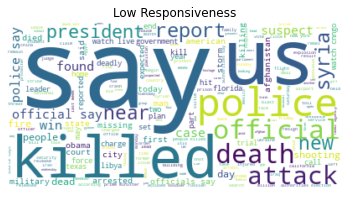

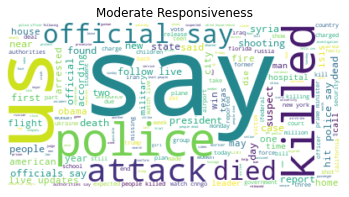

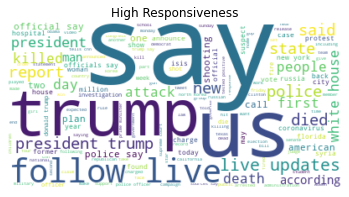

In [ ]:
#low
wordcloud = WordCloud(background_color="white").generate(low_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Low Responsiveness')
plt.show()

#moderate
wordcloud = WordCloud(background_color="white").generate(moderate_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Moderate Responsiveness')
plt.show()

#high
wordcloud = WordCloud(background_color="white").generate(high_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('High Responsiveness')
plt.show()

# Tokenizer

In [ ]:
# max_len=X_train.tweets_Text.map(lambda x: len(x)).max()
max_len = 150
print(max_len)

150


In [ ]:
def get_tweetText(data):
    data_text=data[['tweets_Text']]
    return data_text

In [ ]:
train_text=get_tweetText(X_train)
val_text=get_tweetText(X_val)

In [ ]:
max_features=25000

In [ ]:
from keras.utils import to_categorical
def tokenizer_(train_x, val_x, max_features, maxlen):
    

    train_X = train_x['tweets_Text']
    val_X = val_x['tweets_Text']
    

    tokenizer = Tokenizer(num_words=max_features)
    tokenizer.fit_on_texts(list(train_X))

    train_X = tokenizer.texts_to_sequences(train_X)
    train_X = pad_sequences(train_X, maxlen=maxlen)
    val_X = tokenizer.texts_to_sequences(val_X)
    val_X = pad_sequences(val_X, maxlen=maxlen)

    return train_X, val_X, tokenizer

In [ ]:
train_X_tokenized, val_X_tokenized , tokenizer= tokenizer_(X_train, X_val, max_features, max_len)

Label Encoding 

In [ ]:
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_le = le.fit_transform(y_train)
y_val_le = le.transform(y_val)
##THESE are the final labels
train_Y = to_categorical(y_train_le)
val_Y = to_categorical(y_val_le)

Complete dataframe

In [ ]:
#X_train_new = X_train.reset_index(drop=True)
#train_X_tokenized_new = train_X_tokenized.reset_index(drop=True)

In [ ]:
#X_val_new = X_val.reset_index(drop=True)
#val_X_tokenized_new = val_X_tokenized.reset_index(drop=True)

In [ ]:
X_train_new=X_train[:]
X_val_new=X_val[:]

In [ ]:
X_train_new.drop(["tweets_Text"], axis=1, inplace=True)
X_val_new.drop(["tweets_Text"], axis=1, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
X_train_new.head()

,has_image,has_Link
43803,1,1
15239,0,0
5183,1,1
12024,0,0
45182,1,0


In [ ]:
X_train_new = X_train_new.loc[:, ~X_train_new.columns.str.contains('^Unnamed')]

In [ ]:
X_val_new = X_val_new.loc[:, ~X_val_new.columns.str.contains('^Unnamed')]

In [ ]:
X_train_new.to_numpy()
X_val_new.to_numpy()

array([[1, 1],
       [0, 0],
       [0, 0],
       ...,
       [0, 0],
       [1, 0],
       [0, 0]])

In [ ]:
X_train_new[:4]

,has_image,has_Link
43803,1,1
15239,0,0
5183,1,1
12024,0,0


In [107]:
X_train_df=np.concatenate(( train_X_tokenized, X_train_new), axis=1)


In [108]:
X_val_df=np.concatenate((val_X_tokenized, X_val_new), axis=1)

In [ ]:
X_train_df[:4]

array([[    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
      

In [ ]:
# X_val_df=np.concatenate((X_val_new, val_X_tokenized), axis=1)

In [ ]:
X_val_df.shape

(9353, 152)

# Models

Logistic Regression

In [ ]:
clf = LogisticRegression(max_iter=50000)
clf.fit(train_X_tokenized, y_train)
y_pred_lr = clf.predict(val_X_tokenized)


In [ ]:
print(clf.score(val_X_tokenized, y_val))
print(f1_score(y_val, y_pred_lr, average='macro'))

0.34934607645875254
0.3434522443368606


Decision Tree

In [ ]:
clf = DecisionTreeClassifier()
clf.fit(train_X_tokenized, y_train)
clf.score(val_X_tokenized, y_val)

0.45447686116700203

In [ ]:
print(clf.score(val_X_tokenized, y_val))
print(f1_score(y_val, y_pred_lr, average='macro'))

0.45447686116700203
0.3434522443368606


SVM

In [ ]:
clf = SVC()
clf.fit(train_X_tokenized, y_train)
clf.score(val_X_tokenized, y_val)

0.39738430583501005

In [ ]:
print(clf.score(val_X_tokenized, y_val))
print(f1_score(y_val, y_pred_lr, average='macro'))

0.39738430583501005
0.3434522443368606


Neural Network

In [ ]:
clf = MLPClassifier(random_state=1, max_iter=1000)
clf.fit(train_X_tokenized, y_train)
clf.score(val_X_tokenized, y_val)

0.33702213279678067

In [ ]:
print(clf.score(val_X_tokenized, y_val))
print(f1_score(y_val, y_pred_lr, average='macro'))

0.33702213279678067
0.3434522443368606


Random Forest

In [ ]:
clf = RandomForestClassifier(max_depth=50, random_state=0)
clf.fit(train_X_tokenized, y_train)
clf.score(val_X_tokenized, y_val)

0.5072937625754527

In [ ]:
print(clf.score(val_X_tokenized, y_val))
print(f1_score(y_val, y_pred_lr, average='macro'))

0.33702213279678067
0.3434522443368606


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, Conv1D
from keras.layers import Bidirectional, GlobalMaxPool1D
from keras.models import Model
from keras import initializers, regularizers, constraints, optimizers, layers
from keras.models import Sequential
from keras import layers
from keras import models

**Feature SET**



Tweets Only Train_X: **train_X_tokenized**


Tweets Only Val_X: **val_X_tokenized**

Tweets, Image, hasLink Train_X: **X_train_df**

Tweets, Image, hasLink Val_X: **X_val_df**

Training Label: **train_Y**

Validation Label: **val_Y**

In [ ]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

# 1. Vanilla RNN 

# 1.1 Feature:Only Tweet Text

The feature set only has the tweet

In [ ]:
vanilla_rnn = models.Sequential()
vanilla_rnn.add(layers.Embedding(max_features, 8, input_length=max_len))
vanilla_rnn.add(layers.SimpleRNN(128))
#vanilla_rnn.add(layers.Flatten())
vanilla_rnn.add(layers.Dense(3, activation='softmax'))
vanilla_rnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 150, 8)            200000    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 128)               17536     
_________________________________________________________________
dense (Dense)                (None, 3)                 387       
Total params: 217,923
Trainable params: 217,923
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# vanilla_rnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
vanilla_rnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc',f1_m,precision_m, recall_m])

from tensorflow.keras.callbacks import EarlyStopping
#callbacks = EarlyStopping(monitor='val_loss', min_delta=0, patience = 2)
history = vanilla_rnn.fit(train_X_tokenized,
                    train_Y, 
                    batch_size=100, 
                    epochs=20, 
                    validation_data=(val_X_tokenized, val_Y)
                    #callbacks=callbacks
                    )

Epoch 1/20
375/375 [==============================] - 43s 114ms/step - loss: 1.0932 - acc: 0.3870 - f1_m: 0.0672 - precision_m: 0.2190 - recall_m: 0.0486 - val_loss: 1.0395 - val_acc: 0.5090 - val_f1_m: 0.0364 - val_precision_m: 0.8090 - val_recall_m: 0.0187
Epoch 2/20
375/375 [==============================] - 42s 112ms/step - loss: 0.8586 - acc: 0.5956 - f1_m: 0.4925 - precision_m: 0.7146 - recall_m: 0.3927 - val_loss: 0.8705 - val_acc: 0.5781 - val_f1_m: 0.5174 - val_precision_m: 0.6653 - val_recall_m: 0.4242
Epoch 3/20
375/375 [==============================] - 42s 112ms/step - loss: 0.5965 - acc: 0.7513 - f1_m: 0.7361 - precision_m: 0.7969 - recall_m: 0.6848 - val_loss: 0.9012 - val_acc: 0.5984 - val_f1_m: 0.5802 - val_precision_m: 0.6336 - val_recall_m: 0.5356
Epoch 4/20
375/375 [==============================] - 42s 111ms/step - loss: 0.3726 - acc: 0.8582 - f1_m: 0.8553 - precision_m: 0.8777 - recall_m: 0.8343 - val_loss: 1.0510 - val_acc: 0.5959 - val_f1_m: 0.5886 - val_precisi

In [ ]:
loss, accuracy, f1_score, precision, recall = vanilla_rnn.evaluate(val_X_tokenized, val_Y, verbose=0)
print(loss, accuracy, f1_score, precision, recall)

2.626253366470337 0.5909333825111389 0.5903492569923401 0.5920374989509583 0.5887253284454346


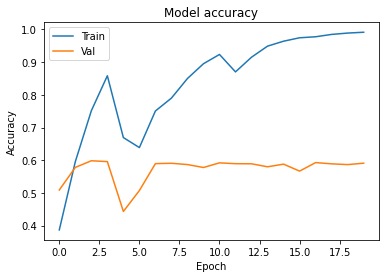

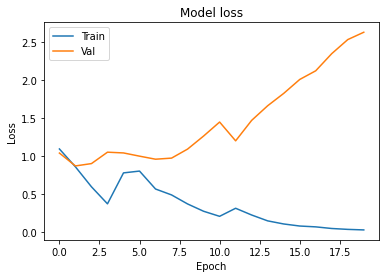

In [ ]:
# plot history
# Plot training & validation accuracy values
import matplotlib.pyplot as plt 
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# 1.2  Feature: Tweets+ links and image column

In [ ]:
vanilla_rnn2 = models.Sequential()
vanilla_rnn2.add(layers.Embedding(max_features, 8, input_length=max_len+2))
vanilla_rnn2.add(layers.SimpleRNN(128))
#vanilla_rnn.add(layers.Flatten())
vanilla_rnn2.add(layers.Dense(3, activation='softmax'))
vanilla_rnn2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 152, 8)            200000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 128)               17536     
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 387       
Total params: 217,923
Trainable params: 217,923
Non-trainable params: 0
_________________________________________________________________


In [ ]:
vanilla_rnn2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy',f1_m,precision_m, recall_m])

from tensorflow.keras.callbacks import EarlyStopping
#callbacks = EarlyStopping(monitor='val_loss', min_delta=0, patience = 2)
history = vanilla_rnn2.fit(X_train_df,
                    train_Y, 
                    batch_size=100, 
                    epochs=20, 
                    validation_data=(X_val_df, val_Y)
                    #callbacks=callbacks
                    )

Epoch 1/20
375/375 [==============================] - 43s 114ms/step - loss: 1.0143 - accuracy: 0.4777 - f1_m: 0.2643 - precision_m: 0.5026 - recall_m: 0.1939 - val_loss: 1.0581 - val_accuracy: 0.4373 - val_f1_m: 0.1003 - val_precision_m: 0.5759 - val_recall_m: 0.0554
Epoch 2/20
375/375 [==============================] - 43s 114ms/step - loss: 0.8521 - accuracy: 0.5922 - f1_m: 0.5259 - precision_m: 0.6814 - recall_m: 0.4326 - val_loss: 0.9319 - val_accuracy: 0.5416 - val_f1_m: 0.4565 - val_precision_m: 0.6471 - val_recall_m: 0.3533
Epoch 3/20
375/375 [==============================] - 43s 115ms/step - loss: 0.7115 - accuracy: 0.6815 - f1_m: 0.6550 - precision_m: 0.7170 - recall_m: 0.6044 - val_loss: 1.0559 - val_accuracy: 0.5064 - val_f1_m: 0.4629 - val_precision_m: 0.5640 - val_recall_m: 0.3930
Epoch 4/20
375/375 [==============================] - 43s 114ms/step - loss: 0.6726 - accuracy: 0.7053 - f1_m: 0.6826 - precision_m: 0.7413 - recall_m: 0.6372 - val_loss: 0.9710 - val_accuracy:

In [ ]:
loss, accuracy, f1_score, precision, recall = vanilla_rnn2.evaluate(X_val_df, val_Y, verbose=0)
print(loss, accuracy, f1_score, precision, recall)

2.1447088718414307 0.5201539397239685 0.5197571516036987 0.524067223072052 0.5156546235084534


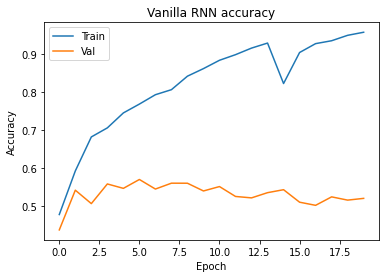

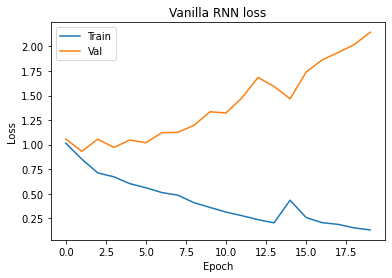

In [ ]:
# plot history
# Plot training & validation accuracy values
import matplotlib.pyplot as plt 
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Vanilla RNN accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Vanilla RNN loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# 2. LSTM

2.1 Feature: Only Tweet Text

2.2 Feature: Tweet Text+ Image and hasLink cols

In [109]:
model = Sequential()

# Input / Embdedding
model.add(Embedding(max_features,100,mask_zero=True))
model.add(LSTM(64,return_sequences=True))
model.add(LSTM(32,return_sequences=False))

# Output layer
model.add(Dense(3, activation='softmax'))

model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, None, 100)         2500000   
_________________________________________________________________
lstm_23 (LSTM)               (None, None, 64)          42240     
_________________________________________________________________
lstm_24 (LSTM)               (None, 32)                12416     
_________________________________________________________________
dense_16 (Dense)             (None, 3)                 99        
Total params: 2,554,755
Trainable params: 2,554,755
Non-trainable params: 0
_________________________________________________________________


In [110]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy',f1_m,precision_m, recall_m])

from tensorflow.keras.callbacks import EarlyStopping
callbacks = EarlyStopping(monitor='loss', min_delta=0, patience = 4)
history = model.fit(X_train_df, 
                    train_Y, 
                    batch_size=100, 
                    epochs=10, 
                    validation_data=(X_val_df, val_Y),
                    callbacks=callbacks
                    )

Epoch 1/10
180/375 [=============>................] - ETA: 2:24 - loss: 0.9568 - accuracy: 0.5101 - f1_m: 0.3338 - precision_m: 0.5760 - recall_m: 0.2440

KeyboardInterrupt: ignored

In [ ]:
loss, accuracy, f1_score, precision, recall = model.evaluate(val_X_tokenized, val_Y, verbose=0)
print(loss, accuracy, f1_score, precision, recall)

2.3912270069122314 0.5778894424438477 0.5783210396766663 0.5815300941467285 0.575239360332489


In [ ]:
# plot history
# Plot training & validation accuracy values
import matplotlib.pyplot as plt 
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('LSTM accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('LSTM loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# 3. LSTM+ GloVe Embeddings

In [ ]:
vocab_size = len(tokenizer.word_index) + 1

In [ ]:
pwd

'/content/drive/My Drive/Study/04_Fall_2020/CSE 243/Project'

In [ ]:
from numpy import array
from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()
#glove_file = open('gdrive/My Drive/HW3_CSE243/sentiment analysis assignment/glove.6B.100d.txt', encoding="utf8")
# glove_file = open('gdrive/My Drive/CSE_243/glove.twitter.27B.100d.txt', encoding="utf8")

# glove_file = open('Twitter_GLoVe_Embeddings/glove.twitter.27B.100d.txt', encoding="utf8")
# glove_file = open('Twitter_GLoVe_Embeddings/glove.twitter.27B.50d.txt', encoding="utf8")
glove_file = open('Twitter_GLoVe_Embeddings/glove.twitter.27B.200d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
glove_file.close()

In [ ]:
glove_dim = 200

In [ ]:
glove_dim

200

In [ ]:
embedding_matrix = zeros((vocab_size, glove_dim))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

3.1 Architecture 1: Feature: Only 

In [87]:
glove_model = models.Sequential()
glove_model.add(layers.Embedding(vocab_size,
                            glove_dim,
                            weights=[embedding_matrix],
                            input_length=max_len,
                            trainable=False))
glove_model.add(layers.Dropout(0.4))
#glove_model.add(layers.LSTM(64))
glove_model.add(LSTM(64,return_sequences=True))
glove_model.add(layers.Dropout(0.3))
glove_model.add(LSTM(32,return_sequences=False))
#glove_model.add(layers.Dense(10,activation="relu"))
glove_model.add(layers.Dropout(0.2))
glove_model.add(Dense(3, activation='softmax'))
glove_model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 150, 200)          10110600  
_________________________________________________________________
dropout_10 (Dropout)         (None, 150, 200)          0         
_________________________________________________________________
lstm_12 (LSTM)               (None, 150, 64)           67840     
_________________________________________________________________
dropout_11 (Dropout)         (None, 150, 64)           0         
_________________________________________________________________
lstm_13 (LSTM)               (None, 32)                12416     
_________________________________________________________________
dropout_12 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 3)                

In [ ]:
glove_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy',f1_m,precision_m, recall_m])

from tensorflow.keras.callbacks import EarlyStopping
#callbacks = EarlyStopping(monitor='val_loss', min_delta=0, patience = 2)
history = glove_model.fit(train_X_tokenized, 
                    train_Y, 
                    batch_size=100, 
                    epochs=150, 
                    validation_data=(val_X_tokenized, val_Y)
                    #callbacks=callbacks
                    )

Epoch 1/150
375/375 [==============================] - 9s 24ms/step - loss: 1.0049 - accuracy: 0.4747 - f1_m: 0.3002 - precision_m: 0.5966 - recall_m: 0.2040 - val_loss: 0.9456 - val_accuracy: 0.5243 - val_f1_m: 0.3505 - val_precision_m: 0.7025 - val_recall_m: 0.2346
Epoch 2/150
375/375 [==============================] - 8s 22ms/step - loss: 0.9607 - accuracy: 0.5125 - f1_m: 0.3688 - precision_m: 0.6497 - recall_m: 0.2594 - val_loss: 0.9244 - val_accuracy: 0.5374 - val_f1_m: 0.4088 - val_precision_m: 0.6830 - val_recall_m: 0.2929
Epoch 3/150
375/375 [==============================] - 8s 22ms/step - loss: 0.9385 - accuracy: 0.5284 - f1_m: 0.3984 - precision_m: 0.6634 - recall_m: 0.2867 - val_loss: 0.9201 - val_accuracy: 0.5394 - val_f1_m: 0.4298 - val_precision_m: 0.6622 - val_recall_m: 0.3194
Epoch 4/150
375/375 [==============================] - 8s 22ms/step - loss: 0.9196 - accuracy: 0.5425 - f1_m: 0.4254 - precision_m: 0.6681 - recall_m: 0.3136 - val_loss: 0.8997 - val_accuracy: 0.5

In [ ]:
loss, accuracy, f1_score, precision, recall = glove_model.evaluate(val_X_tokenized, val_Y, verbose=0)
print(loss, accuracy, f1_score, precision, recall)

0.9444566369056702 0.5989522337913513 0.5859778523445129 0.6281465888023376 0.5504835247993469


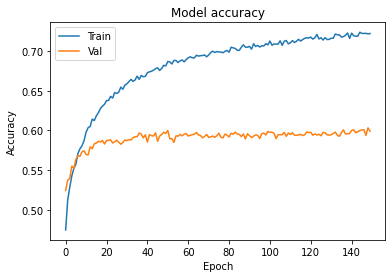

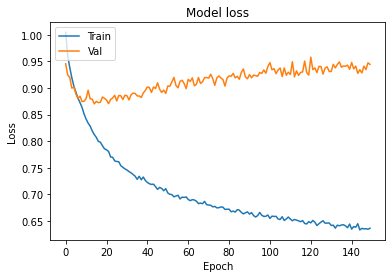

In [ ]:
# plot history
# Plot training & validation accuracy values
import matplotlib.pyplot as plt 
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

Feature: Tweets+Image,hasLink

In [111]:
glove_model_feature2 = models.Sequential()
glove_model_feature2.add(layers.Embedding(vocab_size,
                            glove_dim,
                            weights=[embedding_matrix],
                            input_length=max_len+2,
                            trainable=False))
#glove_model.add(layers.LSTM(64))
glove_model_feature2.add(LSTM(64,return_sequences=True))
# glove_model.add(layers.Dropout(0.3))
glove_model_feature2.add(LSTM(32,return_sequences=False))
glove_model.add(layers.Dropout(0.3))
#glove_model.add(layers.Dense(10,activation="relu"))
#glove_model.add(layers.Dropout(0.2))
glove_model_feature2.add(Dense(3, activation='softmax'))
glove_model_feature2.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_12 (Embedding)     (None, 152, 200)          10110600  
_________________________________________________________________
lstm_25 (LSTM)               (None, 152, 64)           67840     
_________________________________________________________________
lstm_26 (LSTM)               (None, 32)                12416     
_________________________________________________________________
dense_17 (Dense)             (None, 3)                 99        
Total params: 10,190,955
Trainable params: 80,355
Non-trainable params: 10,110,600
_________________________________________________________________


In [112]:
glove_model_feature2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy',f1_m,precision_m, recall_m])

from tensorflow.keras.callbacks import EarlyStopping
#callbacks = EarlyStopping(monitor='val_loss', min_delta=0, patience = 2)
history = glove_model_feature2.fit(X_train_df, 
                    train_Y, 
                    batch_size=100, 
                    epochs=30, 
                    validation_data=(X_val_df, val_Y)
                    #callbacks=callbacks
                    )

Epoch 1/100
375/375 [==============================] - 9s 24ms/step - loss: 0.9379 - accuracy: 0.5312 - f1_m: 0.4123 - precision_m: 0.6491 - recall_m: 0.3108 - val_loss: 0.8790 - val_accuracy: 0.5735 - val_f1_m: 0.4874 - val_precision_m: 0.6774 - val_recall_m: 0.3817
Epoch 2/100
375/375 [==============================] - 8s 23ms/step - loss: 0.8647 - accuracy: 0.5828 - f1_m: 0.4990 - precision_m: 0.6845 - recall_m: 0.3944 - val_loss: 0.8591 - val_accuracy: 0.5889 - val_f1_m: 0.5182 - val_precision_m: 0.6677 - val_recall_m: 0.4244
Epoch 3/100
375/375 [==============================] - 8s 22ms/step - loss: 0.8295 - accuracy: 0.6082 - f1_m: 0.5367 - precision_m: 0.6938 - recall_m: 0.4389 - val_loss: 0.8653 - val_accuracy: 0.5834 - val_f1_m: 0.5175 - val_precision_m: 0.6579 - val_recall_m: 0.4273
Epoch 4/100
375/375 [==============================] - 8s 22ms/step - loss: 0.7957 - accuracy: 0.6283 - f1_m: 0.5746 - precision_m: 0.6995 - recall_m: 0.4887 - val_loss: 0.8384 - val_accuracy: 0.6

KeyboardInterrupt: ignored

In [88]:
loss, accuracy, f1_score, precision, recall = glove_model_feature2.evaluate(X_val_df, val_Y, verbose=0)
print(loss, accuracy, f1_score, precision, recall)

3.5617892742156982 0.5342670679092407 0.534708559513092 0.5361977815628052 0.5332764387130737


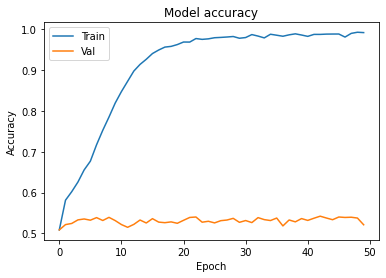

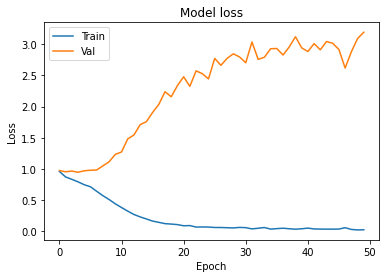

In [76]:
# plot history
# Plot training & validation accuracy values
import matplotlib.pyplot as plt 
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

**Architecture 2**

In [ ]:
glove_model2 = models.Sequential()
glove_model2.add(layers.Embedding(vocab_size,
                            glove_dim,
                            weights=[embedding_matrix],
                            input_length=max_len,
                            trainable=False))
#glove_model.add(layers.LSTM(64))
glove_model2.add(LSTM(128,return_sequences=True))
glove_model2.add(layers.Dropout(0.3))
glove_model2.add(LSTM(64,return_sequences=True))
glove_model2.add(layers.Dropout(0.3))
glove_model2.add(LSTM(32,return_sequences=False))
glove_model2.add(layers.Dropout(0.3))
glove_model2.add(layers.Dense(10,activation="relu"))
#glove_model2.add(layers.Dense(10,activation="relu"))
#glove_model.add(layers.Dropout(0.2))
glove_model2.add(Dense(3, activation='softmax'))
glove_model2.summary()

In [ ]:
glove_model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy',f1_m,precision_m, recall_m])

from tensorflow.keras.callbacks import EarlyStopping

history = glove_model2.fit(train_X_tokenized, 
                    train_Y, 
                    batch_size=100, 
                    epochs=100, 
                    validation_data=(val_X_tokenized, val_Y)
                   
                    )

Epoch 1/100
375/375 [==============================] - 14s 36ms/step - loss: 0.9988 - accuracy: 0.4820 - f1_m: 0.2846 - precision_m: 0.5836 - recall_m: 0.1940 - val_loss: 0.9452 - val_accuracy: 0.5168 - val_f1_m: 0.4199 - val_precision_m: 0.6388 - val_recall_m: 0.3138
Epoch 2/100
375/375 [==============================] - 13s 34ms/step - loss: 0.9369 - accuracy: 0.5309 - f1_m: 0.3959 - precision_m: 0.6771 - recall_m: 0.2837 - val_loss: 0.9140 - val_accuracy: 0.5396 - val_f1_m: 0.4280 - val_precision_m: 0.6814 - val_recall_m: 0.3131
Epoch 3/100
375/375 [==============================] - 13s 34ms/step - loss: 0.8959 - accuracy: 0.5610 - f1_m: 0.4460 - precision_m: 0.6845 - recall_m: 0.3328 - val_loss: 0.8945 - val_accuracy: 0.5575 - val_f1_m: 0.4346 - val_precision_m: 0.7063 - val_recall_m: 0.3151
Epoch 4/100
375/375 [==============================] - 13s 34ms/step - loss: 0.8586 - accuracy: 0.5852 - f1_m: 0.4927 - precision_m: 0.6988 - recall_m: 0.3827 - val_loss: 0.8998 - val_accuracy:

In [ ]:
loss, accuracy, f1_score, precision, recall = glove_model2.evaluate(val_X_tokenized, val_Y, verbose=0)
print(loss, accuracy, f1_score, precision, recall)

2.7360236644744873 0.6163797974586487 0.6169232130050659 0.6175201535224915 0.6163490414619446


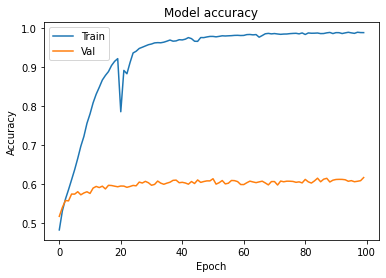

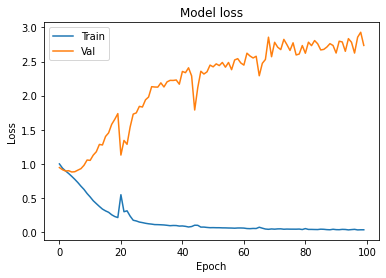

In [ ]:
# plot history
# Plot training & validation accuracy values
import matplotlib.pyplot as plt 
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

Bi-Directional LSTM

In [189]:

glove_model3 = models.Sequential()
glove_model3.add(layers.Embedding(vocab_size,
                            glove_dim,
                            weights=[embedding_matrix],
                            input_length=max_len,
                            trainable=False))

glove_model3.add(Bidirectional(layers.LSTM(128, return_sequences=True)))
glove_model3.add(Bidirectional(layers.LSTM(128)))

# glove_model2_fs3_bi_d.add(Bidirectional(layers.LSTM(64, return_sequences=True)))
# glove_model2_fs3_bi_d.add(Bidirectional(layers.LSTM(64)))

glove_model3.add(layers.Dense(10,activation="relu"))
glove_model3.add(Dense(3, activation='softmax'))
glove_model3.summary()





Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_23 (Embedding)     (None, 150, 200)          10110600  
_________________________________________________________________
bidirectional_15 (Bidirectio (None, 150, 256)          336896    
_________________________________________________________________
bidirectional_16 (Bidirectio (None, 256)               394240    
_________________________________________________________________
dense_33 (Dense)             (None, 10)                2570      
_________________________________________________________________
dense_34 (Dense)             (None, 3)                 33        
Total params: 10,844,339
Trainable params: 733,739
Non-trainable params: 10,110,600
_________________________________________________________________


In [191]:
glove_model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy',f1_m,precision_m, recall_m])

from tensorflow.keras.callbacks import EarlyStopping

history = glove_model3.fit(train_X_tokenized, 
                    train_Y, 
                    batch_size=100, 
                    epochs=50, 
                    validation_data=(val_X_tokenized, val_Y)
                    )

Epoch 1/50
375/375 [==============================] - 24s 63ms/step - loss: 0.9721 - accuracy: 0.5057 - f1_m: 0.3459 - precision_m: 0.6272 - recall_m: 0.2452 - val_loss: 0.9294 - val_accuracy: 0.5363 - val_f1_m: 0.3684 - val_precision_m: 0.7054 - val_recall_m: 0.2506
Epoch 2/50
375/375 [==============================] - 22s 60ms/step - loss: 0.9118 - accuracy: 0.5468 - f1_m: 0.4334 - precision_m: 0.6763 - recall_m: 0.3215 - val_loss: 0.9212 - val_accuracy: 0.5365 - val_f1_m: 0.3995 - val_precision_m: 0.6909 - val_recall_m: 0.2824
Epoch 3/50
375/375 [==============================] - 22s 60ms/step - loss: 0.8674 - accuracy: 0.5793 - f1_m: 0.4906 - precision_m: 0.6834 - recall_m: 0.3847 - val_loss: 0.8848 - val_accuracy: 0.5607 - val_f1_m: 0.4810 - val_precision_m: 0.6612 - val_recall_m: 0.3792
Epoch 4/50
375/375 [==============================] - 23s 60ms/step - loss: 0.8252 - accuracy: 0.6048 - f1_m: 0.5397 - precision_m: 0.6937 - recall_m: 0.4438 - val_loss: 0.8910 - val_accuracy: 0.5

In [193]:
loss, accuracy, f1_score, precision, recall = glove_model2.evaluate(val_X_tokenized, val_Y, verbose=0)
print(loss, accuracy, f1_score, precision, recall)

2.7360236644744873 0.6163797974586487 0.6169232130050659 0.6175201535224915 0.6163490414619446


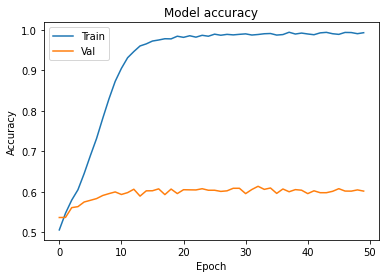

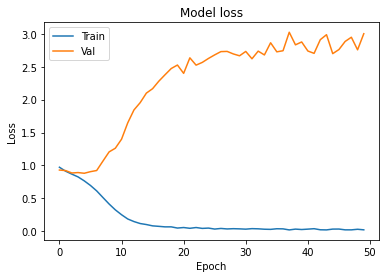

In [194]:
# plot history
# Plot training & validation accuracy values
import matplotlib.pyplot as plt 
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()  

**Feature: Tweets+Image,hasLink**

In [ ]:
glove_model2_feature2 = models.Sequential()
glove_model2_feature2.add(layers.Embedding(vocab_size,
                            glove_dim,
                            weights=[embedding_matrix],
                            input_length=max_len+2,
                            trainable=False))
#glove_model.add(layers.LSTM(64))
glove_model2_feature2.add(LSTM(128,return_sequences=True))
glove_model2.add(layers.Dropout(0.8))
glove_model2_feature2.add(LSTM(64,return_sequences=True))
glove_model2.add(layers.Dropout(0.3))
glove_model2_feature2.add(LSTM(32,return_sequences=False))
glove_model2.add(layers.Dropout(0.3))
glove_model2_feature2.add(layers.Dense(10,activation="relu"))
#glove_model2.add(layers.Dense(10,activation="relu"))
#glove_model.add(layers.Dropout(0.2))
glove_model2_feature2.add(Dense(3, activation='softmax'))
glove_model2_feature2.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 152, 200)          10110600  
_________________________________________________________________
lstm_9 (LSTM)                (None, 152, 128)          168448    
_________________________________________________________________
lstm_10 (LSTM)               (None, 152, 64)           49408     
_________________________________________________________________
lstm_11 (LSTM)               (None, 32)                12416     
_________________________________________________________________
dense_7 (Dense)              (None, 10)                330       
_________________________________________________________________
dense_8 (Dense)              (None, 3)                 33        
Total params: 10,341,235
Trainable params: 230,635
Non-trainable params: 10,110,600
____________________________________

In [ ]:
X_train_df.shape

(37408, 152)

In [77]:
glove_model2_feature2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy',f1_m,precision_m, recall_m])

from tensorflow.keras.callbacks import EarlyStopping

history = glove_model2_feature2.fit(X_train_df, 
                    train_Y, 
                    batch_size=100, 
                    epochs=50, 
                    validation_data=(X_val_df, val_Y)
                   
                    )

Epoch 1/50
375/375 [==============================] - 14s 37ms/step - loss: 0.0308 - accuracy: 0.9893 - f1_m: 0.9894 - precision_m: 0.9894 - recall_m: 0.9893 - val_loss: 3.0730 - val_accuracy: 0.5343 - val_f1_m: 0.5339 - val_precision_m: 0.5349 - val_recall_m: 0.5330
Epoch 2/50
375/375 [==============================] - 13s 34ms/step - loss: 0.0297 - accuracy: 0.9898 - f1_m: 0.9898 - precision_m: 0.9899 - recall_m: 0.9897 - val_loss: 3.1650 - val_accuracy: 0.5242 - val_f1_m: 0.5238 - val_precision_m: 0.5250 - val_recall_m: 0.5227
Epoch 3/50
375/375 [==============================] - 13s 34ms/step - loss: 0.0316 - accuracy: 0.9887 - f1_m: 0.9887 - precision_m: 0.9888 - recall_m: 0.9886 - val_loss: 2.9063 - val_accuracy: 0.5339 - val_f1_m: 0.5341 - val_precision_m: 0.5358 - val_recall_m: 0.5325
Epoch 4/50
375/375 [==============================] - 13s 35ms/step - loss: 0.0315 - accuracy: 0.9892 - f1_m: 0.9893 - precision_m: 0.9894 - recall_m: 0.9892 - val_loss: 2.9663 - val_accuracy: 0.5

In [89]:
loss, accuracy, f1_score, precision, recall = glove_model2_feature2.evaluate(X_val_df, val_Y, verbose=0)
print(loss, accuracy, f1_score, precision, recall)

3.085869073867798 0.5368331074714661 0.5371353626251221 0.5380499362945557 0.5362509489059448


In [ ]:
# plot history
# Plot training & validation accuracy values
import matplotlib.pyplot as plt 
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

Features: TweetText + Likes + Retweets

In [78]:
data_long = pd.read_csv('CSE243-TweetResponsePrediction/Data-new/Data-clean/2011-2020_all_cols.csv')

In [137]:
data_long.head()

,tweets_Date,tweets_Likes,tweets_Replies,tweets_Retweets,tweets_Text,has_image,has_Link
0,"Dec 31, 2019",292.0,30.0,97.0,syd mead visionary artist helped shape look bl...,1,0
1,"Dec 31, 2019",494.0,178.0,193.0,us sending additional forces protect embassy b...,1,0
2,"Dec 31, 2019",205.0,28.0,74.0,book publishing legend sonny mehta editorinchi...,1,0
3,"Dec 31, 2019",319.0,165.0,128.0,president trump weighs protesters attempts sto...,1,0
4,"Dec 31, 2019",198.0,77.0,101.0,proiranian protesters tried storm us embassy b...,1,0


In [138]:
data_long.dropna(subset=['tweets_Text'], inplace=True) 

In [83]:
labels_long = data_long["tweets_ResponseCategory"]
data_long.drop("tweets_ResponseCategory", axis=1, inplace=True)

In [160]:
X_train_l, X_val_l, y_train_l, y_val_l = train_test_split(data_long, labels, test_size=0.20, random_state=42)

In [161]:
train_text_l = get_tweetText(X_train_l)
val_text_l = get_tweetText(X_val_l)


train_X_tokenized_l, val_X_tokenized_l, tokenizer_l = tokenizer_(X_train_l, X_val_l, max_features, max_len)


In [162]:
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_le_l = le.fit_transform(y_train_l)
y_val_le_l = le.transform(y_val_l)
##THESE are the final labels
train_Y_l = to_categorical(y_train_le_l)
val_Y_l = to_categorical(y_val_le_l)

In [163]:
X_train_l.head()

,tweets_Date,tweets_Likes,tweets_Replies,tweets_Retweets,tweets_Text,has_image,has_Link
43803,"Aug 4, 2015",442.0,46.0,398.0,les munro last surviving pilot rafs legendary ...,1,1
15239,"May 17, 2016",296.0,43.0,237.0,senate approves 11 billion compromise bill com...,0,0
5183,Oct 22,1000.0,141.0,265.0,moderna first company start us clinical trials...,1,1
12024,"Jun 29, 2012",29.0,77.0,298.0,dallas naacp seeks end texas lottery saying dr...,0,0
45182,"Apr 8, 2017",609.0,68.0,308.0,great white shark trapped reef along californi...,1,0


In [164]:
X_train_new_l = X_train_l[:]
X_val_new_l = X_val_l[:]


In [165]:
X_train_new_l.drop(["tweets_Text", "tweets_Date", "tweets_Replies", "has_image", "has_Link"], axis=1, inplace=True)
X_val_new_l.drop(["tweets_Text", "tweets_Date", "tweets_Replies", "has_image", "has_Link"], axis=1, inplace=True)


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [166]:
X_val_new_l.head()


,tweets_Likes,tweets_Retweets
5598,4400.0,690.0
3714,979.0,183.0
29029,13.0,140.0
20840,336.0,440.0
20999,133.0,249.0


In [167]:
X_val_new_l['tweets_Likes'] = X_val_new_l['tweets_Likes'].fillna(0) 
X_val_new_l['tweets_Retweets'] = X_val_new_l['tweets_Retweets'].fillna(0) 

X_train_new_l['tweets_Likes'] = X_train_new_l['tweets_Likes'].fillna(0) 
X_train_new_l['tweets_Retweets'] = X_train_new_l['tweets_Retweets'].fillna(0) 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [168]:
X_val_new_l['tweets_Likes'] = X_val_new_l['tweets_Likes'].astype(np.int64)
X_val_new_l['tweets_Retweets'] = X_val_new_l['tweets_Retweets'].astype(np.int64)

X_train_new_l['tweets_Likes'] = X_train_new_l['tweets_Likes'].astype(np.int64)
X_train_new_l['tweets_Retweets'] = X_train_new_l['tweets_Retweets'].astype(np.int64)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [169]:
X_train_new_l['tweets_Likes'] = (X_train_new_l['tweets_Likes'] - X_train_new_l['tweets_Likes'].min()) / (X_train_new_l['tweets_Likes'].max() - X_train_new_l['tweets_Likes'].min())
X_train_new_l['tweets_Retweets'] = (X_train_new_l['tweets_Retweets'] - X_train_new_l['tweets_Retweets'].min()) / (X_train_new_l['tweets_Retweets'].max() - X_train_new_l['tweets_Retweets'].min())

X_val_new_l['tweets_Likes'] = (X_val_new_l['tweets_Likes'] - X_val_new_l['tweets_Likes'].min()) / (X_val_new_l['tweets_Likes'].max() - X_val_new_l['tweets_Likes'].min())
X_val_new_l['tweets_Retweets'] = (X_val_new_l['tweets_Retweets'] - X_val_new_l['tweets_Retweets'].min()) / (X_val_new_l['tweets_Retweets'].max() - X_val_new_l['tweets_Retweets'].min())



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [170]:
X_train_new_l.head()

,tweets_Likes,tweets_Retweets
43803,0.001781,0.003477
15239,0.001193,0.002063
5183,0.004029,0.002309
12024,0.000117,0.002599
45182,0.002454,0.002687


In [171]:
X_val_new_l.head()

,tweets_Likes,tweets_Retweets
5598,0.107821,0.024469
3714,0.023971,0.006358
29029,0.000294,0.004822
20840,0.008211,0.015538
20999,0.003235,0.008716


In [172]:

X_train_new_l.to_numpy()
X_val_new_l.to_numpy()

X_train_df_l = np.concatenate(( train_X_tokenized_l, X_train_new_l), axis=1)
X_val_df_l = np.concatenate(( val_X_tokenized_l, X_val_new_l), axis=1)

# X_val_df_l = np.concatenate(( X_val_new_l, val_X_tokenized_l), axis=1)



In [173]:
X_train_df_l.shape

(37408, 152)

Model (Best Working Architecture) from previous experiments

In [174]:
glove_model2_fs3 = models.Sequential()
glove_model2_fs3.add(layers.Embedding(vocab_size,
                            glove_dim,
                            weights=[embedding_matrix],
                            input_length=max_len+2,
                            trainable=False))
#glove_model2_fs3.add(layers.LSTM(64))
glove_model2_fs3.add(LSTM(128,return_sequences=True))
glove_model2_fs3.add(layers.Dropout(0.3))
glove_model2_fs3.add(LSTM(64,return_sequences=True))
glove_model2_fs3.add(layers.Dropout(0.3))
glove_model2_fs3.add(LSTM(32,return_sequences=False))
glove_model2_fs3.add(layers.Dropout(0.3))
glove_model2_fs3.add(layers.Dense(10,activation="relu"))
#glove_model2_fs3.add(layers.Dense(10,activation="relu"))
#glove_model2_fs3.add(layers.Dropout(0.2))
glove_model2_fs3.add(Dense(3, activation='softmax'))
glove_model2_fs3.summary()



Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_15 (Embedding)     (None, 152, 200)          10110600  
_________________________________________________________________
lstm_32 (LSTM)               (None, 152, 128)          168448    
_________________________________________________________________
dropout_27 (Dropout)         (None, 152, 128)          0         
_________________________________________________________________
lstm_33 (LSTM)               (None, 152, 64)           49408     
_________________________________________________________________
dropout_28 (Dropout)         (None, 152, 64)           0         
_________________________________________________________________
lstm_34 (LSTM)               (None, 32)                12416     
_________________________________________________________________
dropout_29 (Dropout)         (None, 32)              

In [175]:
glove_model2_fs3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy',f1_m,precision_m, recall_m])

from tensorflow.keras.callbacks import EarlyStopping

history = glove_model2_fs3.fit(X_train_df_l, 
                    train_Y_l, 
                    batch_size=100, 
                    epochs=100, 
                    validation_data=(X_val_df_l, val_Y_l)
                    )



Epoch 1/100
375/375 [==============================] - 14s 36ms/step - loss: 0.9856 - accuracy: 0.4951 - f1_m: 0.3325 - precision_m: 0.6263 - recall_m: 0.2318 - val_loss: 0.9434 - val_accuracy: 0.5230 - val_f1_m: 0.4067 - val_precision_m: 0.6466 - val_recall_m: 0.2976
Epoch 2/100
375/375 [==============================] - 13s 33ms/step - loss: 0.9308 - accuracy: 0.5384 - f1_m: 0.4122 - precision_m: 0.6685 - recall_m: 0.3006 - val_loss: 0.9190 - val_accuracy: 0.5451 - val_f1_m: 0.3816 - val_precision_m: 0.7251 - val_recall_m: 0.2602
Epoch 3/100
375/375 [==============================] - 13s 34ms/step - loss: 0.8930 - accuracy: 0.5638 - f1_m: 0.4566 - precision_m: 0.6768 - recall_m: 0.3472 - val_loss: 0.9213 - val_accuracy: 0.5363 - val_f1_m: 0.4599 - val_precision_m: 0.6428 - val_recall_m: 0.3589
Epoch 4/100
375/375 [==============================] - 13s 34ms/step - loss: 0.8605 - accuracy: 0.5833 - f1_m: 0.5014 - precision_m: 0.6866 - recall_m: 0.3963 - val_loss: 0.8958 - val_accuracy:

In [185]:
# # Input for variable-length sequences of integers
# inputs = keras.Input(shape=(None,), dtype="int32")
# # Embed each integer in a 128-dimensional vector
# x = layers.Embedding(max_features, 128)(inputs)
# # Add 2 bidirectional LSTMs
# x = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(x)
# x = layers.Bidirectional(layers.LSTM(64))(x)
# # Add a classifier
# outputs = layers.Dense(1, activation="sigmoid")(x)
# model = keras.Model(inputs, outputs)
# model.summary()


glove_model2_fs3_bi_d = models.Sequential()
glove_model2_fs3_bi_d.add(layers.Embedding(vocab_size,
                            glove_dim,
                            weights=[embedding_matrix],
                            input_length=max_len+2,
                            trainable=False))

glove_model2_fs3_bi_d.add(Bidirectional(layers.LSTM(128, return_sequences=True)))
glove_model2_fs3_bi_d.add(Bidirectional(layers.LSTM(128)))


# glove_model2_fs3_bi_d.add(Bidirectional(layers.LSTM(64, return_sequences=True)))
# glove_model2_fs3_bi_d.add(Bidirectional(layers.LSTM(64)))


glove_model2_fs3_bi_d.add(layers.Dense(10,activation="relu"))
glove_model2_fs3_bi_d.add(Dense(3, activation='softmax'))
glove_model2_fs3_bi_d.summary()





Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_21 (Embedding)     (None, 152, 200)          10110600  
_________________________________________________________________
bidirectional_11 (Bidirectio (None, 152, 256)          336896    
_________________________________________________________________
bidirectional_12 (Bidirectio (None, 256)               394240    
_________________________________________________________________
dense_29 (Dense)             (None, 10)                2570      
_________________________________________________________________
dense_30 (Dense)             (None, 3)                 33        
Total params: 10,844,339
Trainable params: 733,739
Non-trainable params: 10,110,600
_________________________________________________________________


In [186]:
glove_model2_fs3_bi_d.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy',f1_m,precision_m, recall_m])

from tensorflow.keras.callbacks import EarlyStopping

history = glove_model2_fs3_bi_d.fit(X_train_df_l, 
                    train_Y_l, 
                    batch_size=100, 
                    epochs=10, 
                    validation_data=(X_val_df_l, val_Y_l)
                    )



Epoch 1/10
375/375 [==============================] - 24s 64ms/step - loss: 0.9730 - accuracy: 0.4998 - f1_m: 0.3495 - precision_m: 0.6251 - recall_m: 0.2481 - val_loss: 0.9232 - val_accuracy: 0.5432 - val_f1_m: 0.3935 - val_precision_m: 0.6971 - val_recall_m: 0.2751
Epoch 2/10
375/375 [==============================] - 23s 60ms/step - loss: 0.9106 - accuracy: 0.5480 - f1_m: 0.4337 - precision_m: 0.6741 - recall_m: 0.3223 - val_loss: 0.8992 - val_accuracy: 0.5636 - val_f1_m: 0.4543 - val_precision_m: 0.6765 - val_recall_m: 0.3431
Epoch 3/10
375/375 [==============================] - 23s 61ms/step - loss: 0.8699 - accuracy: 0.5738 - f1_m: 0.4827 - precision_m: 0.6855 - recall_m: 0.3751 - val_loss: 0.8938 - val_accuracy: 0.5652 - val_f1_m: 0.4904 - val_precision_m: 0.6536 - val_recall_m: 0.3933
Epoch 4/10
375/375 [==============================] - 23s 61ms/step - loss: 0.8278 - accuracy: 0.6008 - f1_m: 0.5344 - precision_m: 0.6911 - recall_m: 0.4373 - val_loss: 0.8775 - val_accuracy: 0.5